# Linear Classification and Perceptron

This exercise gives you an introduction on perceptron and linear classification (binary classification). 

**Instructions:**
- You will be using Python 3.
- Fill in `tut2_perceptron.ipynb`. After coding your function, run the cell right below it to check if your result is correct.

**After this assignment you will:**
- Be able to understand linear classfication and perceptron.
- Be able to build a linear function to linearly seperate samples of two classes (binary classification).
- Be able to understand the limitation for linear function on non-linear separable data.

Let's get started!

## 1 - Linear Classification with Perceptron ##

### 1.1 - Linear Classication

Linear classification is a linear function 

$$\begin{align*} & y = f(x) = {w}^{T}x + b \end{align*}\tag{1}$$

where $w$ denotes the weight of the input instance, $x$ denotes the input variable, that separates instances of different classes. For now, we will focus on the **binary classification** in which the output $y$ can take on only two discrete values called **classes**, -1 and 1.

### 1.2 - Perceptron 

![linear classification](images/linear-classification.png)
Perceptron is an algorithm for learning a binary classifier:

$$\begin{align*} & f(x) = 
    \begin{cases}
        1   & \quad \text{if } {w}^{T}x + b \geq 0 \\
        -1  & \quad \text{if } {w}^{T}x + b < 0
      \end{cases} \end{align*}\tag{2}$$

For instance, if we are trying to build a spam classifier for email, then $x(i)$ may be some features of a piece of email, and $y$ may be 1 if it is a piece of spam mail, and -1 otherwise. -1 is also called the negative class, and 1 the positive class, and they are sometimes also denoted by the symbols “-” and “+”.

From a gepmetric perspective, $w$ is the slope, which are also called **weights**. $b$ is the interceept of the linear function, also called the **bias**.

## 2 - Linear Separability

The training instances are linearly separable if there exists a hyperplane that will separate the two classes.
First, we will draw some data points on the graph using `plt.scatter` from matplotlib.

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
import time

In [2]:
X = np.zeros( (6,2) )
X[:,1] = 1
for i in range(6): X[i,0] = i+1
X
Y = np.zeros( 6 )
for i in range(6): Y[i] = 0 if i < 3 else 1
(X,Y)

(array([[1., 1.],
        [2., 1.],
        [3., 1.],
        [4., 1.],
        [5., 1.],
        [6., 1.]]), array([0., 0., 0., 1., 1., 1.]))

<IPython.core.display.Javascript object>


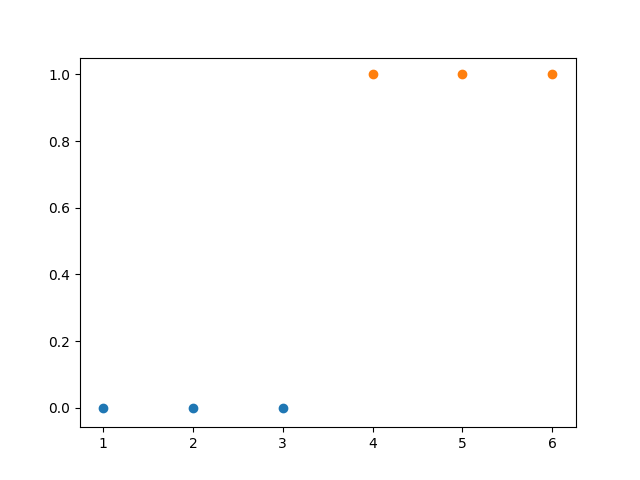

In [3]:
fig, ax = plt.subplots()
plt.scatter(X[:3,0], Y[:3])
plt.scatter(X[3:,0], Y[3:], marker='o')
plt.show()

### 2.1 - Linearly Seperable
Define s function that can linearly seperate the two different classes of examples. 

**Exercise**: Build a function that returns a list of x,y for the linear function that can linear seperate the two different classes of examples. There can be multiple anwsers. 


In [9]:
def linear_function():
    x = np.zeros( 6 )
    y = np.zeros( 6 )
    for i in range(6): x[i] = i + 1
    y = [1, 0.8, 0.6, 0.4, 0.2, 0]
    return x, y

<IPython.core.display.Javascript object>


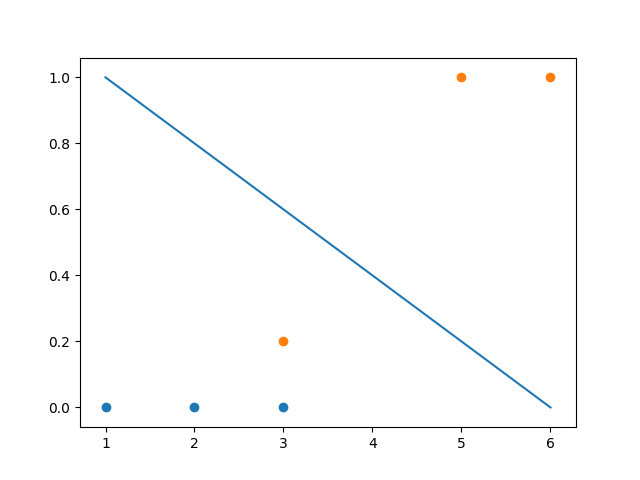

In [10]:
x, y = linear_function()
fig, ax = plt.subplots()
plt.plot(x, y)
plt.scatter(X[:3,0], Y[:3])
plt.scatter(X[3:,0], Y[3:], marker='o')
plt.show()

### 2.2 - Non-linearly Seperable

What if we add some noise to the data now? The above linear function can no longer linearly seperated the examples. 

**Exercise**: Build a. function `linear_function_update()` that returns a list of x,y that can linear seperate the two different classes of examples. There can be multiple anwsers. 

In [16]:
# noisy data
Y[3] = 0.2
X[3,0] = 3

<IPython.core.display.Javascript object>


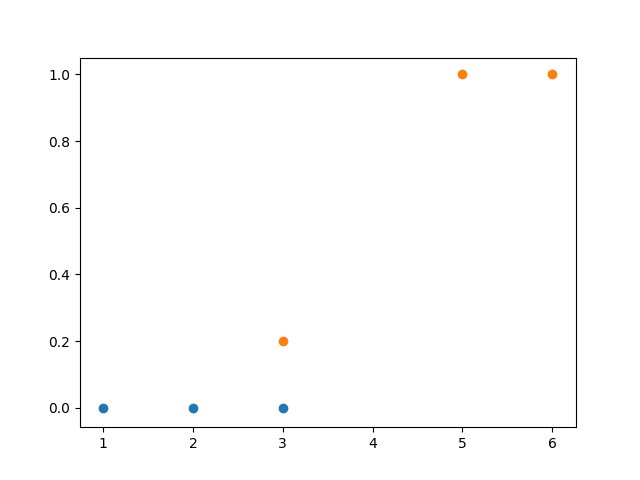

In [17]:
fig, ax = plt.subplots()
plt.scatter(X[:3,0], Y[:3])
plt.scatter(X[3:,0], Y[3:], marker='o')
plt.show()

<IPython.core.display.Javascript object>


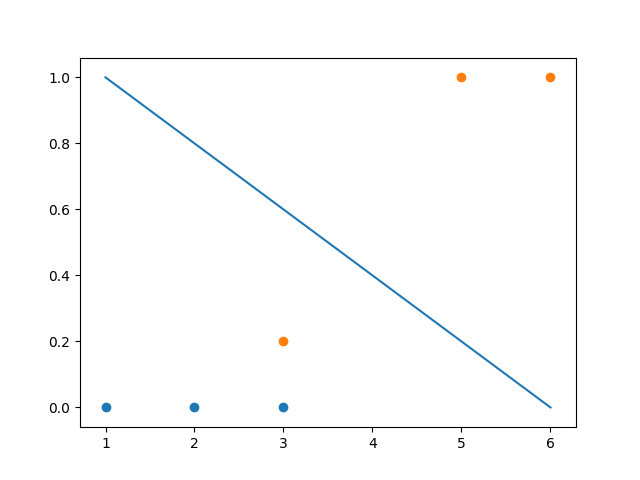

In [13]:
x, y = linear_function()
fig, ax = plt.subplots()
plt.plot(x, y)
plt.scatter(X[:3,0], Y[:3])
plt.scatter(X[3:,0], Y[3:], marker='o')
plt.show()

In [24]:
def linear_function_update():
    """
    Build a linear function that can linearly seperate the above examples.

    Return:
    x,y -- list of x, y of the linear function
    """
    x = np.zeros( 6 )
    y = np.zeros( 6 )
    ### START CODE HERE ### (≈ 2 line of code)
    for i in range(6): x[i] = i + 1
    y = [0.2, 0.15, 0.1, 0.05, 0.0, -0.05]
    ### END CODE HERE ###
    return x,y

<IPython.core.display.Javascript object>


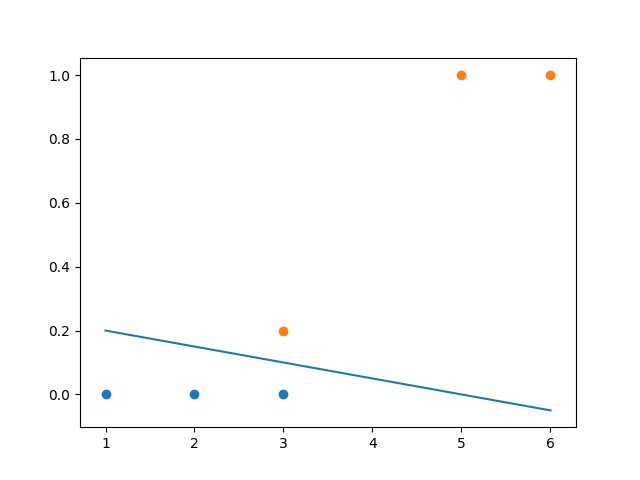

In [25]:
x, y = linear_function_update()
fig, ax = plt.subplots()
plt.plot(x, y)
plt.scatter(X[:3,0], Y[:3])
plt.scatter(X[3:,0], Y[3:], marker='o')
plt.show()

### What to do with cases like these?

In real life, we usually have data that are non-linearly seperable by linear function like the perceptron algorithm. In these cases, we could not draw a linear line to seperate the two classes of samples completely. Hence, we may need to use other algorithms such as non-linear functions, which we will discuss in the coming tutorials.

<IPython.core.display.Javascript object>


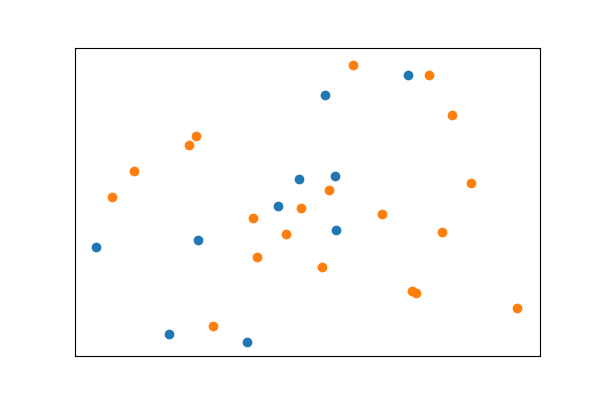

In [30]:
def nonlinear_model(rseed=42, n_samples=30):
    radius = 40 * np.random.random(n_samples)
    far_pts = radius > 20
    radius[far_pts] *= 1.2
    radius[~far_pts] *= 1.1

    theta = np.random.random(n_samples) * np.pi * 2

    data = np.empty((n_samples, 2))
    data[:, 0] = radius * np.cos(theta)
    data[:, 1] = radius * np.sin(theta)

    labels = np.ones(n_samples)
    labels[far_pts] = -1

    return data, labels


x, y = nonlinear_model()

plt.figure(figsize=(6, 4))
ax = plt.subplot(1, 1, 1, xticks=[], yticks=[])
ax.scatter(x[:10, 0], x[:10, 1])
ax.scatter(x[10:, 0], x[10:, 1], marker='o')


## Conclusion

- Perceptron is an algorithm for learning a binary classifier. 
    - If data is linearly seperable, the perceptron algorithm will classify samples into 2 classes, namely positive class (1) and negative class (-1). 
    - If data is non-linearly seperable, we may need to update the perceptron algorithm or use non-linear functions, which will be covered in future tutorials. 